In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from tabulate import tabulate  
from docx import Document
from docx.shared import Inches
import statsmodels.api as sm

# Load data
file_path = r"C:\Users\user\Downloads\Telegram Desktop\SeriZamani_Sanat_81-99.xlsx"
time_series_data = pd.read_excel(file_path, sheet_name='سری زمانی', header=1)

# Clean data
time_series_data.columns = time_series_data.columns.str.rstrip("'")

# Group by data
workshop_counts_per_year = time_series_data.groupby('سال')['تعداد کارگاه'].sum()

summary_table = pd.DataFrame({
    'Year': workshop_counts_per_year.index,
    'Number of Workshops': workshop_counts_per_year.values
})

# Console output
print(tabulate(summary_table, headers='keys', tablefmt='fancy_grid', showindex=False))

# Chart
plt.figure(figsize=(10, 6))
plt.plot(workshop_counts_per_year.index, workshop_counts_per_year.values, marker='o', linestyle='-', color='b')

plt.title('Number of Active Workshops Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Workshops')
plt.xticks(workshop_counts_per_year.index, rotation=45)  
plt.grid(True)

# Save plot to an image file
plot_image_path = r"C:\Users\user\Downloads\workshop_trends_plot.png"
plt.savefig(plot_image_path)
plt.close()  # Close the plot to avoid displaying in the console

# Create a Word document
doc = Document()
doc.add_heading('Number of Active Workshops Over Time', 0)

# Add the table to Word document
doc.add_heading('Workshop Summary Table:', level=1)
table = doc.add_table(rows=1, cols=len(summary_table.columns))
hdr_cells = table.rows[0].cells
for i, column_name in enumerate(summary_table.columns):
    hdr_cells[i].text = column_name

for index, row in summary_table.iterrows():
    row_cells = table.add_row().cells
    for i, value in enumerate(row):
        row_cells[i].text = str(value)

# Add the plot to Word document
doc.add_heading('Workshop Count Trends Plot:', level=1)
doc.add_paragraph('The following chart shows the trends in the number of active workshops.')
doc.add_picture(plot_image_path, width=Inches(5))

# Save Word document
word_output_path = r"C:\Users\user\Downloads\workshop_trends_report.docx"
doc.save(word_output_path)

print("\nWord report has been saved to:", word_output_path)


╒════════╤═══════════════════════╕
│   Year │   Number of Workshops │
╞════════╪═══════════════════════╡
│   1381 │                 38542 │
├────────┼───────────────────────┤
│   1382 │                 45588 │
├────────┼───────────────────────┤
│   1383 │                 45956 │
├────────┼───────────────────────┤
│   1384 │                 45806 │
├────────┼───────────────────────┤
│   1385 │                 47465 │
├────────┼───────────────────────┤
│   1386 │                 50190 │
├────────┼───────────────────────┤
│   1387 │                 50794 │
├────────┼───────────────────────┤
│   1388 │                 51397 │
├────────┼───────────────────────┤
│   1389 │                 52603 │
├────────┼───────────────────────┤
│   1390 │                 54955 │
├────────┼───────────────────────┤
│   1391 │                 55383 │
├────────┼───────────────────────┤
│   1392 │                 58594 │
├────────┼───────────────────────┤
│   1393 │                 59310 │
├────────┼──────────

In [4]:


# Clean data
time_series_data.columns = time_series_data.columns.str.strip()

# Numeric columns
time_series_data['Unnamed: 13'] = pd.to_numeric(time_series_data['Unnamed: 13'], errors='coerce')  # Men with wages
time_series_data['Unnamed: 14'] = pd.to_numeric(time_series_data['Unnamed: 14'], errors='coerce')  # Women with wages
time_series_data['Unnamed: 15'] = pd.to_numeric(time_series_data['Unnamed: 15'], errors='coerce')  # Men without wages
time_series_data['Unnamed: 16'] = pd.to_numeric(time_series_data['Unnamed: 16'], errors='coerce')  # Women without wages
time_series_data['Unnamed: 11'] = pd.to_numeric(time_series_data['Unnamed: 11'], errors='coerce')  # Total men
time_series_data['Unnamed: 12'] = pd.to_numeric(time_series_data['Unnamed: 12'], errors='coerce')  # Total women

# Filtering data for specific activity
filtered_data = time_series_data[time_series_data['فعالیت'] == 'تولید صنعتی (ساخت)؛']

# Create table for employee count
employee_table = pd.DataFrame({
    'Year': filtered_data['سال'],
    'Men with wages': filtered_data['Unnamed: 13'],
    'Women with wages': filtered_data['Unnamed: 14'],
    'Men without wages': filtered_data['Unnamed: 15'],
    'Women without wages': filtered_data['Unnamed: 16'],
    'Total men': filtered_data['Unnamed: 11'],
    'Total women': filtered_data['Unnamed: 12'],
})

# Print the table in the console
print("\nEmployee Count by Gender and Wage Status for 'Industrial Production (Manufacturing)' activity:")
print(tabulate(employee_table, headers='keys', tablefmt='fancy_grid', showindex=False))

# Plotting the data
plt.figure(figsize=(10, 6))

plt.plot(employee_table['Year'], employee_table['Men with wages'], label='Men with wages', marker='o', linestyle='-', color='b')
plt.plot(employee_table['Year'], employee_table['Women with wages'], label='Women with wages', marker='o', linestyle='-', color='g')
plt.plot(employee_table['Year'], employee_table['Men without wages'], label='Men without wages', marker='o', linestyle='-', color='r')
plt.plot(employee_table['Year'], employee_table['Women without wages'], label='Women without wages', marker='o', linestyle='-', color='m')

# Label plot
plt.title('Trends in Employee Count by Gender and Wage Status (Industrial Production)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Employee Count', fontsize=12)
plt.legend(title='Wage Status and Gender')
plt.grid(True)
plt.xticks(employee_table['Year'], rotation=45)
plt.tight_layout()

# Save plot to an image file
plot_image_path = r"C:\Users\user\Downloads\employee_trends_plot.png"
plt.savefig(plot_image_path)
plt.close()  # Close the plot to avoid displaying in the console

# Create a Word document
doc = Document()
doc.add_heading('Employee Count by Gender and Wage Status (Industrial Production)', 0)

# Add the table to Word document
doc.add_heading('Employee Count Table:', level=1)
table = doc.add_table(rows=1, cols=len(employee_table.columns))
hdr_cells = table.rows[0].cells
for i, column_name in enumerate(employee_table.columns):
    hdr_cells[i].text = column_name

for index, row in employee_table.iterrows():
    row_cells = table.add_row().cells
    for i, value in enumerate(row):
        row_cells[i].text = str(value)

# Add the plot to Word document
doc.add_heading('Employee Count Trends Plot:', level=1)
doc.add_paragraph('The following chart shows the trends in employee count by gender and wage status.')
doc.add_picture(plot_image_path, width=Inches(5))

# Save Word document
word_output_path = r"C:\Users\user\Downloads\employee_trends_report.docx"
doc.save(word_output_path)

print("\nWord report has been saved to:", word_output_path)



Employee Count by Gender and Wage Status for 'Industrial Production (Manufacturing)' activity:
╒════════╤══════════════════╤════════════════════╤═════════════════════╤═══════════════════════╤═════════════╤═══════════════╕
│   Year │   Men with wages │   Women with wages │   Men without wages │   Women without wages │   Total men │   Total women │
╞════════╪══════════════════╪════════════════════╪═════════════════════╪═══════════════════════╪═════════════╪═══════════════╡
│   1381 │      1.09521e+06 │              85488 │               20352 │                   603 │ 1.11556e+06 │         86091 │
├────────┼──────────────────┼────────────────────┼─────────────────────┼───────────────────────┼─────────────┼───────────────┤
│   1382 │      1.1646e+06  │             100494 │               18462 │                   390 │ 1.18306e+06 │        100884 │
├────────┼──────────────────┼────────────────────┼─────────────────────┼───────────────────────┼─────────────┼───────────────┤
│   1383 │     

In [5]:


# Cleaning data
time_series_data.columns = time_series_data.columns.str.strip()

# Rename columns
time_series_data.rename(columns={
    'سال': 'Year',
    'فعالیت': 'Activity',
    'ارزش محصولات تولیدشده': 'Production Value',
    'ارزش فروش': 'Sales Value',
    'ارزش تشکیل سرمایه': 'Capital Formation Value',
    'Unnamed: 31': 'Additional Capital Formation'
}, inplace=True)

# Remove unwanted row
time_series_data = time_series_data[time_series_data['Activity'] != 'تولید صنعتی (ساخت)؛']

# Convert columns to numeric
time_series_data['Production Value'] = pd.to_numeric(time_series_data['Production Value'], errors='coerce')
time_series_data['Sales Value'] = pd.to_numeric(time_series_data['Sales Value'], errors='coerce')
time_series_data['Capital Formation Value'] = pd.to_numeric(time_series_data['Capital Formation Value'], errors='coerce')
time_series_data['Additional Capital Formation'] = pd.to_numeric(time_series_data['Additional Capital Formation'], errors='coerce')

# Drop rows with missing values
time_series_data = time_series_data.dropna(subset=['Production Value', 'Sales Value', 'Capital Formation Value', 'Additional Capital Formation'])

# Calculate total capital
time_series_data['Total Capital Formation'] = time_series_data['Capital Formation Value'] + time_series_data['Additional Capital Formation']

# Create report table
report_table = time_series_data[['Year', 'Activity', 'Production Value', 'Sales Value', 'Total Capital Formation']]

# Create Word document
doc = Document()
doc.add_heading('Production, Sales, and Capital Formation Report', 0)

# Add table to Word document
table = doc.add_table(rows=1, cols=5)
table.style = 'Table Grid'

# Add table headers
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Year'
hdr_cells[1].text = 'Activity'
hdr_cells[2].text = 'Production Value'
hdr_cells[3].text = 'Sales Value'
hdr_cells[4].text = 'Total Capital Formation'

# Add table data
for index, row in report_table.iterrows():
    row_cells = table.add_row().cells
    row_cells[0].text = str(row['Year'])
    row_cells[1].text = str(row['Activity'])
    row_cells[2].text = str(row['Production Value'])
    row_cells[3].text = str(row['Sales Value'])
    row_cells[4].text = str(row['Total Capital Formation'])

# Generate unique color for each section
unique_sections = time_series_data['Activity'].unique()
colors = plt.cm.get_cmap('tab20', len(unique_sections))

# Set font for Persian support
plt.rcParams['font.family'] = 'Tahoma'

# Create plots and save as images

# Production Value Plot
plt.figure(figsize=(12, 8))
for idx, section in enumerate(unique_sections):
    section_data = time_series_data[time_series_data['Activity'] == section]
    color = colors(idx)
    plt.plot(section_data['Year'], section_data['Production Value'], label=f'{section} - Production Value', color=color)

plt.title("Production Value Over Time by Section")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
production_value_plot_path = r"C:\Users\user\Desktop\production_value_plot.png"
plt.savefig(production_value_plot_path)
plt.close()

# Add plot to Word document
doc.add_paragraph('Production Value Plot:')
doc.add_picture(production_value_plot_path, width=Inches(5.5))

# Sales Value Plot
plt.figure(figsize=(12, 8))
for idx, section in enumerate(unique_sections):
    section_data = time_series_data[time_series_data['Activity'] == section]
    color = colors(idx)
    plt.plot(section_data['Year'], section_data['Sales Value'], label=f'{section} - Sales Value', color=color)

plt.title("Sales Value Over Time by Section")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
sales_value_plot_path = r"C:\Users\user\Desktop\sales_value_plot.png"
plt.savefig(sales_value_plot_path)
plt.close()

# Add plot to Word document
doc.add_paragraph('Sales Value Plot:')
doc.add_picture(sales_value_plot_path, width=Inches(5.5))

# Total Capital Formation Plot
plt.figure(figsize=(12, 8))
for idx, section in enumerate(unique_sections):
    section_data = time_series_data[time_series_data['Activity'] == section]
    color = colors(idx)
    plt.plot(section_data['Year'], section_data['Total Capital Formation'], label=f'{section} - Total Capital Formation', color=color)

plt.title("Total Capital Formation Over Time by Section")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
total_capital_formation_plot_path = r"C:\Users\user\Desktop\total_capital_formation_plot.png"
plt.savefig(total_capital_formation_plot_path)
plt.close()

# Add plot to Word document
doc.add_paragraph('Total Capital Formation Plot:')
doc.add_picture(total_capital_formation_plot_path, width=Inches(5.5))

# Save Word document
word_file_path = r"C:\Users\user\Desktop\Production_Sales_Capital_Report.docx"
doc.save(word_file_path)

print(f"Report has been saved to {word_file_path}")


C:\Users\user\AppData\Local\Temp\ipykernel_29764\4108777135.py:59: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_sections))


Report has been saved to C:\Users\user\Desktop\Production_Sales_Capital_Report.docx


In [ ]:
import pandas as pd
from docx import Document
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib import dates
from docx.shared import Inches

# Load data
file_path = r"C:\Users\user\Downloads\Telegram Desktop\SeriZamani_Sanat_81-99.xlsx"
time_series_data = pd.read_excel(file_path, sheet_name='سری زمانی', header=1)

# Clean the column names to remove any extra spaces
time_series_data.columns = time_series_data.columns.str.strip()

# Remove columns with 'Unnamed' in their names
time_series_data = time_series_data.loc[:, ~time_series_data.columns.str.contains('^Unnamed')]

# Check the column names to verify 'فعالیت' exists
print("Column names:", time_series_data.columns)

# If 'فعالیت' is found, proceed with the filtering
if 'فعالیت' in time_series_data.columns:
    # Convert to numeric (if there are any issues with numeric values)
    time_series_data['ارزش مواد خام و اولیه، لوازم بسته‌بندی، ابزار و وسایل کار کم‌دوام'] = pd.to_numeric(
        time_series_data['ارزش مواد خام و اولیه، لوازم بسته‌بندی، ابزار و وسایل کار کم‌دوام'], errors='coerce')

    # Filter data for Industrial Production
    filtered_data = time_series_data[time_series_data['فعالیت'] == 'تولید صنعتی (ساخت)؛']

    # Create table for Word document
    utility_consumption_table = pd.DataFrame({
        'Year': filtered_data['سال'],
        'Utility Consumption': filtered_data['ارزش مواد خام و اولیه، لوازم بسته‌بندی، ابزار و وسایل کار کم‌دوام']
    })

    # Create a Word document
    doc = Document()
    doc.add_heading('Utility Consumption Data', 0)

    # Add table to the document
    table = doc.add_table(rows=1, cols=2)
    table.style = 'Table Grid'

    # Add table headers
    hdr_cells = table.rows[0].cells
    hdr_cells[0].text = 'Year'
    hdr_cells[1].text = 'Utility Consumption'

    # Add table data
    for index, row in utility_consumption_table.iterrows():
        row_cells = table.add_row().cells
        row_cells[0].text = str(row['Year'])
        row_cells[1].text = str(row['Utility Consumption'])

    # Create plot
    plt.figure(figsize=(10, 6))
    plt.plot(utility_consumption_table['Year'], utility_consumption_table['Utility Consumption'], label='Utility Consumption', marker='o', linestyle='-', color='b')

    # Label plot
    plt.title('Utility Consumption (Raw Materials, Packaging, Tools and Consumables)', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.legend(title='Utility Consumption')
    plt.grid(True)
    plt.xticks(utility_consumption_table['Year'], rotation=45)

    # Save plot as image
    plot_image_path = r"C:\Users\user\Desktop\utility_consumption_plot.png"
    plt.tight_layout()
    plt.savefig(plot_image_path)
    plt.close()  # Close plot to avoid display

    # Add plot image to the document
    doc.add_paragraph('Utility Consumption Plot:')
    doc.add_picture(plot_image_path, width=Inches(5.5))

    # Save Word document
    table_file_path = r"C:\Users\user\Desktop\Utility_Consumption_Report.docx"
    doc.save(table_file_path)

    print(f"Table and plot have been saved to {table_file_path}")

else:
    print("Column 'فعالیت' is missing in the data.")


Column names: Index(['سال', 'سطح کد فعالیت', 'کد فعالیت', 'فعالیت', 'تعداد کارگاه',
       'وضع مالکیت', 'نحوه مدیریت', 'تعداد شاغلان', 'ارزش جبران خدمات',
       'ارزش مواد خام و اولیه، لوازم بسته‌بندی، ابزار و وسایل کار کم‌دوام',
       'ارزش محصولات تولیدشده', 'ارزش فروش', 'ارزش صادرات مستقیم',
       'ارزش نهاده‌ فعالیت صنعتی', 'ارزش ستانده‌ فعالیت صنعتی',
       'ارزش افزوده فعالیت صنعتی', 'ارزش خدمات غیرصنعتی',
       'ارزش مالیات غیرمستقیم و عوارض', 'ارزش تشکیل سرمایه'],
      dtype='object')
Table and plot have been saved to C:\Users\user\Desktop\Utility_Consumption_Report.docx


Quastion 3

انتخاب دو صنعت دارویی با کد 21 و صنعت ساخت سازه ای فلزی با کد 25

In [16]:
# Load data
file_path = r"C:\Users\user\Downloads\Telegram Desktop\SeriZamani_Sanat_81-99.xlsx"
time_series_data = pd.read_excel(file_path, sheet_name='سری زمانی', header=1)

# Clean data
time_series_data.columns = time_series_data.columns.str.rstrip("'")
# numeric column
time_series_data['کد فعالیت'] = pd.to_numeric(time_series_data['کد فعالیت'], errors='coerce')

# filter data
filtered_data = time_series_data[time_series_data['کد فعالیت'].isin([21, 25])]

# filter for specific year
pre_treatment_data = filtered_data[filtered_data['سال'].between(1387, 1393)]




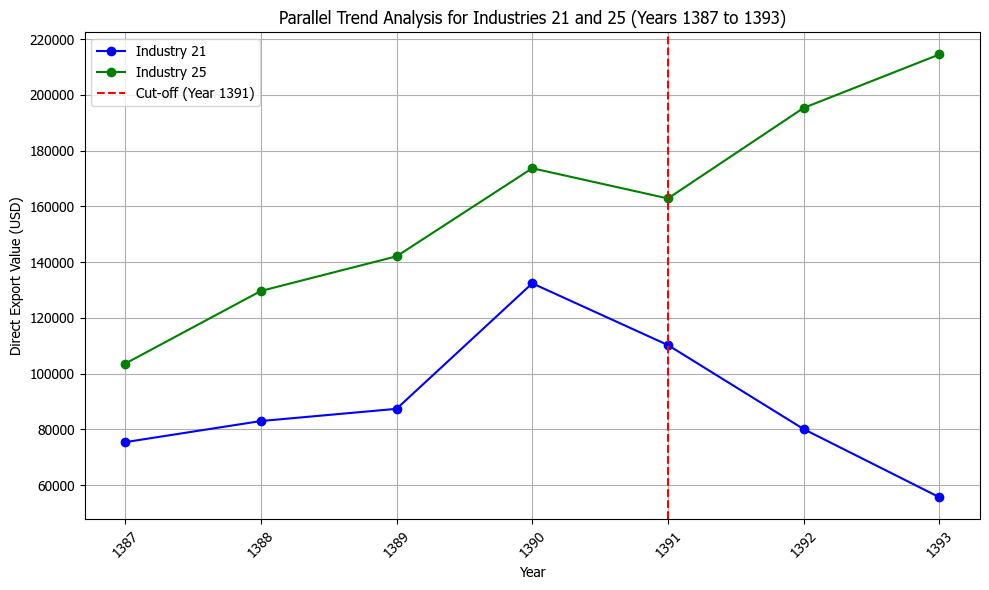

In [17]:
file_path = r"C:\Users\user\Downloads\Telegram Desktop\SeriZamani_Sanat_81-99.xlsx"
time_series_data = pd.read_excel(file_path, sheet_name='سری زمانی', header=1)

# داده‌های کد 21 و 25 در سال‌های 1387 تا 1391
industry_21_pre = pre_treatment_data[pre_treatment_data['کد فعالیت'] == 21]
industry_25_pre = pre_treatment_data[pre_treatment_data['کد فعالیت'] == 25]

# رسم ترند برای کد 21 و کد 25
plt.figure(figsize=(10, 6))

# ترند کد 21
plt.plot(industry_21_pre['سال'], industry_21_pre['Unnamed: 23'], label='Industry 21', color='b', marker='o', linestyle='-')

# ترند کد 25
plt.plot(industry_25_pre['سال'], industry_25_pre['Unnamed: 23'], label='Industry 25', color='g', marker='o', linestyle='-')

# رسم خط نقطه چین عمودی در سال 91
plt.axvline(x=1391, color='r', linestyle='--', label='Cut-off (Year 1391)')

# تنظیمات نمودار
plt.title('Parallel Trend Analysis for Industries 21 and 25 (Years 1387 to 1393)')
plt.xlabel('Year')
plt.ylabel('Direct Export Value (USD)')
plt.legend()

# تنظیم مقیاس محور x به صورت سال به سال
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(industry_21_pre['سال'], rotation=45)

plt.grid(True)

# نمایش نمودار
plt.tight_layout()
plt.show()


In [18]:

# Load data
file_path = r"C:\Users\user\Downloads\Telegram Desktop\SeriZamani_Sanat_81-99.xlsx"
time_series_data = pd.read_excel(file_path, sheet_name='سری زمانی', header=1)

# Clean data
time_series_data.columns = time_series_data.columns.str.rstrip("'")


# پاک‌سازی داده‌ها
time_series_data.columns = time_series_data.columns.str.rstrip("'")
time_series_data['کد فعالیت'] = pd.to_numeric(time_series_data['کد فعالیت'], errors='coerce')

# فیلتر کردن داده‌ها برای کدهای 21 و 25
filtered_data = time_series_data[time_series_data['کد فعالیت'].isin([21, 25])]

# فیلتر کردن داده‌ها برای سال‌های 1387 تا 1393
pre_treatment_data = filtered_data[filtered_data['سال'].between(1387, 1393)]

# فیلتر کردن داده‌های مربوط به کد 21 و 25
industry_21_pre = pre_treatment_data[pre_treatment_data['کد فعالیت'] == 21]
industry_25_pre = pre_treatment_data[pre_treatment_data['کد فعالیت'] == 25]

# بررسی شرط Parallel Trend برای سال‌های 1389 تا 1391

# فیلتر کردن داده‌ها برای سال‌های قبل از 1392 (1389 تا 1391)
pre_1392_data = pre_treatment_data[pre_treatment_data['سال'].between(1389, 1391)]

# اضافه کردن متغیر دامی برای گروه‌های درمان‌شده و شاهد
pre_1392_data.loc[:, 'treatment'] = pre_1392_data['کد فعالیت'].apply(lambda x: 1 if x == 21 else 0)

# اضافه کردن یک متغیر برای سال‌های قبل از تغییر (یعنی 1389 تا 1391)
pre_1392_data.loc[:, 'pre_change'] = pre_1392_data['سال'].apply(lambda x: 1 if x < 1392 else 0)

# اضافه کردن متغیر تعامل بین گروه درمان‌شده و سال‌های قبل از تغییر
pre_1392_data.loc[:, 'interaction'] = pre_1392_data['treatment'] * pre_1392_data['pre_change']

# اطمینان از داده‌های عددی
pre_1392_data['Unnamed: 23'] = pd.to_numeric(pre_1392_data['Unnamed: 23'], errors='coerce')

# حذف ردیف‌هایی که مقدار NaN دارند
pre_1392_data.dropna(subset=['Unnamed: 23', 'treatment', 'pre_change', 'interaction'], inplace=True)

# اجرای مدل آماری Parallel Trends برای سال‌های 1389 تا 1391
X = pre_1392_data[['treatment', 'pre_change', 'interaction']]
X = sm.add_constant(X)  # اضافه کردن یک ستون ثابت برای مدل
y = pre_1392_data['Unnamed: 23']  # متغیر وابسته

# اجرای رگرسیون OLS
model = sm.OLS(y, X).fit()

# ایجاد فایل Word جدید
doc = Document()

# اضافه کردن عنوان
doc.add_heading('گزارش نتایج رگرسیون Parallel Trends', 0)

# اضافه کردن خلاصه‌ای از مدل
doc.add_paragraph('مدل رگرسیون OLS برای آزمون Parallel Trends بر اساس داده‌های سال‌های 1389 تا 1391 اجرا شد.')

# اضافه کردن نتایج مدل
doc.add_paragraph('نتایج رگرسیون OLS به شرح زیر است:')

# اضافه کردن جدول نتایج رگرسیون
table = doc.add_table(rows=1, cols=4)
table.style = 'Table Grid'

# اضافه کردن سرستون‌ها
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'ویژگی'
hdr_cells[1].text = 'ضریب'
hdr_cells[2].text = 'خطای استاندارد'
hdr_cells[3].text = 'مقدار p'

# اضافه کردن مقادیر رگرسیون به جدول
for param, value, std_err, p_value in zip(model.params.index, model.params, model.bse, model.pvalues):
    row_cells = table.add_row().cells
    row_cells[0].text = str(param)
    row_cells[1].text = f'{value:.4f}'
    row_cells[2].text = f'{std_err:.4f}'
    row_cells[3].text = f'{p_value:.4f}'

# اضافه کردن نتیجه کلی
doc.add_paragraph(f'\nنتیجه آزمون Parallel Trends:')
if model.pvalues['interaction'] > 0.05:
    doc.add_paragraph('نتیجه آزمون نشان می‌دهد که روند قبل از تغییر برای گروه‌های درمان‌شده و شاهد مشابه بوده است.')
else:
    doc.add_paragraph('نتیجه آزمون نشان می‌دهد که روند قبل از تغییر برای گروه‌های درمان‌شده و شاهد متفاوت بوده است.')

# ذخیره فایل Word
output_path = r"C:\Users\user\Desktop\Parallel_Trends_Report.docx"
doc.save(output_path)

print(f"گزارش در فایل Word ذخیره شد: {output_path}")
        

گزارش در فایل Word ذخیره شد: C:\Users\user\Desktop\Parallel_Trends_Report.docx


C:\Users\user\AppData\Local\Temp\ipykernel_29764\3457361510.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_1392_data.loc[:, 'treatment'] = pre_1392_data['کد فعالیت'].apply(lambda x: 1 if x == 21 else 0)
C:\Users\user\AppData\Local\Temp\ipykernel_29764\3457361510.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_1392_data.loc[:, 'pre_change'] = pre_1392_data['سال'].apply(lambda x: 1 if x < 1392 else 0)
C:\Users\user\AppData\Local\Temp\ipykernel_29764\3457361510.py:35: SettingWithCopyWarning:

In [19]:
# Load data
file_path = r"C:\Users\user\Downloads\Telegram Desktop\SeriZamani_Sanat_81-99.xlsx"
time_series_data = pd.read_excel(file_path, sheet_name='سری زمانی', header=1)

# Clean data
time_series_data.columns = time_series_data.columns.str.rstrip("'")

# Add a dummy variable for treated groups
pre_treatment_data.loc[:, 'treatment'] = pre_treatment_data['کد فعالیت'].apply(lambda x: 1 if x == 21 else 0)

# Add a dummy variable for the period before and after 1392 (intervention)
pre_treatment_data.loc[:, 'post_1392'] = pre_treatment_data['سال'].apply(lambda x: 1 if x >= 1392 else 0)

# Add an interaction variable for treated groups and the period after 1392
pre_treatment_data.loc[:, 'interaction'] = pre_treatment_data['treatment'] * pre_treatment_data['post_1392']

# Ensure numerical data for the variable
pre_treatment_data['Unnamed: 23'] = pd.to_numeric(pre_treatment_data['Unnamed: 23'], errors='coerce')

# Drop rows with NaN values
pre_treatment_data.dropna(subset=['Unnamed: 23', 'treatment', 'post_1392', 'interaction'], inplace=True)

# Define X and y for the Diff-in-Dif model
X = pre_treatment_data[['treatment', 'post_1392', 'interaction']]
X = sm.add_constant(X)  # Add a constant column for the model
y = pre_treatment_data['Unnamed: 23']  # Dependent variable

# Run OLS regression
model_did = sm.OLS(y, X).fit()

# Print the Diff-in-Dif model results
print(model_did.summary())

# Create a new Word document for DID results report
doc_did = Document()

# Add title
doc_did.add_heading('Diff-in-Dif (DID) Model Results Report', 0)

# Add a brief model summary
doc_did.add_paragraph('The Diff-in-Dif model was applied to assess the impact of the intervention in 1392.')

# Add model results
doc_did.add_paragraph('The results of the Diff-in-Dif model are as follows:')

# Add a table for regression results
table_did = doc_did.add_table(rows=1, cols=4)
table_did.style = 'Table Grid'

# Add column headers
hdr_cells = table_did.rows[0].cells
hdr_cells[0].text = 'Feature'
hdr_cells[1].text = 'Coefficient'
hdr_cells[2].text = 'Standard Error'
hdr_cells[3].text = 'p-value'

# Add regression values to the table
for param, value, std_err, p_value in zip(model_did.params.index, model_did.params, model_did.bse, model_did.pvalues):
    row_cells = table_did.add_row().cells
    row_cells[0].text = str(param)
    row_cells[1].text = f'{value:.4f}'
    row_cells[2].text = f'{std_err:.4f}'
    row_cells[3].text = f'{p_value:.4f}'

# Add a general conclusion
doc_did.add_paragraph(f'\nDID Test Result:')
if model_did.pvalues['interaction'] > 0.05:
    doc_did.add_paragraph('The test result suggests that the impact of the intervention in 1392 was similar for both the treatment and control groups.')
else:
    doc_did.add_paragraph('The test result suggests that the impact of the intervention in 1392 was different for the treatment and control groups.')

# Save the Word file
output_did_path = r"C:\Users\user\Desktop\DID_Report_1392.docx"
doc_did.save(output_did_path)

print(f"DID report has been saved in the Word file: {output_did_path}")


                            OLS Regression Results                            
Dep. Variable:            Unnamed: 23   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     14.28
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           0.000603
Time:                        20:52:44   Log-Likelihood:                -158.67
No. Observations:                  14   AIC:                             325.3
Df Residuals:                      10   BIC:                             327.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.424e+05   1.07e+04     13.306      

C:\Users\user\AppData\Local\Temp\ipykernel_29764\3089739206.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_treatment_data.loc[:, 'treatment'] = pre_treatment_data['کد فعالیت'].apply(lambda x: 1 if x == 21 else 0)
C:\Users\user\AppData\Local\Temp\ipykernel_29764\3089739206.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_treatment_data.loc[:, 'post_1392'] = pre_treatment_data['سال'].apply(lambda x: 1 if x >= 1392 else 0)
C:\Users\user\AppData\Local\Temp\ipykernel_29764\3089739206.py:15: Sett

   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   -------------------------- ------------- 1.3/1.9 MB 6.1 MB/s eta 0:00:01
   ------------------------------------- -- 1.8/1.9 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 1.9/1.9 MB 4.1 MB/s eta 0:00:00
